# 2CSSID-TP02. Régression


- Nom : ABCHICHE
- Prénom : Sarah

In [1]:
import matplotlib
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
%matplotlib inline

np.__version__, pd.__version__, matplotlib.__version__

('1.18.1', '1.0.1', '3.1.3')

In [2]:
from typing          import Tuple, List, Type
from collections.abc import Callable

## I. Réalisation des algorithmes

Dans cette partie, on va implémenter les fonctions de régression à partir de zéro (from scratch). Cela va nous permettre à comprendre COMMENT les algorithmes fonctionnement : leurs complexités (temporelles et spatiales) et leurs paramètres.
Pour ce faire, on va utiliser la bibliothèque **numpy** qui est utile dans les calcules surtout matricielles.

### I.1. Régression linéaire

Premièrement, on va implémenter les fonctions nécéssaires pour la régression linéaire.

#### I.1.1. Fonction de prédiction

$$Z = zf(X, theta) = \theta_0 + \sum\limits_{j=1}^{N} \theta_j X_j = \sum\limits_{j=0}^{N} \theta_j X_j | X_0 = 1 $$

- X : une matrice de M lignes (échantillons) et (N + 1) colonnes (caractéristiques). Avant d'utiliser cette fonction, on doit augmenter la matrice originale avec une colonne pour $X_0 = 1$ si on veut utiliser $\theta_0$
- $\theta$ : un vecteur des paramétres avec une taille (N + 1)
- Z : un vecteur de taille M

In [3]:
# TODO: Calculer la combinaison linéaire [2mn]
# X: une matrice [M, N] de M échantillons et N caractéristiques
# Theta: un vecteur des paramètres (N)
# Résultat: un vecteur de M prédictions
def zf(X: np.ndarray, Theta: np.ndarray) -> np.ndarray:
    return X @ Theta

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : array([1. , 1.7, 2.4])
#---------------------------------------------------------------------
X_t = np.array([[1., 100.], [1., 200.], [1., 300.]])
Theta_t = np.array([0.3, 0.007])
zf(X_t, Theta_t)

array([1. , 1.7, 2.4])

#### I.1.2. Fonction du coût

La fonction du coût calcule l'erreur entre les valeurs estimées ($H$) en utilisant la fonction de prédiction $z$ précédente (H = Z(X, theta) et les valeurs réelles ($Y$).
Ici, on va utiliser l'erreur quadratique moyenne (MSE: mean square error). 

$$J = MSE(Y, H) = \frac{1}{2M} \sum\limits_{i=1}^{M} (Y - H)^2$$

In [9]:
# TODO: Définir la fonction du coût MSE [5mn]
# Y: un vecteur de M échantillons (les valeurs réelles)
# H: un vecteur de M échantillons (les prédictions)
# Résulat: une valeur réelle représenntant le coût MSE
def MSE(Y: np.ndarray, H: np.ndarray) -> float:
    return (1 / 2 / Y.shape[0]) * np.sum( (Y - H)**2 )

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 0.016666666666666673
#---------------------------------------------------------------------
H_t = np.array([1. , 1.7, 2.4])
Y_t = np.array([1., 2., 2.5])
MSE(Y_t, H_t)

0.016666666666666673

Le gradient de cette fonction est calculé comme suit : 

$$\frac{\partial MSE}{\partial \theta_j} 
= \frac{\partial }{\partial \theta_j} \frac{1}{2M} \sum\limits_{i=1}^{M} (Y^{(i)} - H^{(i)})^2 
= \frac{1}{2M} \sum\limits_{i=1}^{M} [\frac{\partial }{\partial \theta_j} (Y^{(i)} - H^{(i)})^2]
= \frac{1}{2M} \sum\limits_{i=1}^{M} [-2 (Y^{(i)} - H^{(i)}) \frac{\partial }{\partial \theta_j} H^{(i)}]
$$

$$\frac{\partial MSE}{\partial \theta_j}
= \frac{1}{M} \sum\limits_{i=1}^{M} [(H^{(i)} - Y^{(i)}) \frac{\partial }{\partial \theta_j} \sum\limits_{k=0}^{N} \theta_k X_k^{(i)}]
= \frac{1}{M} \sum\limits_{i=1}^{M} [(H^{(i)} - Y^{(i)}) \frac{\partial }{\partial \theta_j} \theta_j X_j^{(i)}]
$$

$$\frac{\partial MSE}{\partial \theta_j} = \frac{1}{M} \sum\limits_{i=1}^{M} (H^{(i)} - Y^{(i)}) X_j^{(i)}$$

- 
Où $X^{(i)}$ est l'échantillon $i$ et $Y^{(i)}$ est la prédiction. $X_0^{(i)} = 1$

In [11]:
# TODO: Définir la fonction de gradient MSE [5mn]
# X: une matrice [M, N] de M échantillons et N caractéristiques
# Y: un vecteur de M échantillons (les valeurs réelles)
# H: un vecteur de M échantillons (les prédictions)
# Résultat: un vecteur de N gradients (un gradient pour chaque théta)
def dMSE(X: np.ndarray, Y: np.ndarray, H: np.ndarray) -> np.ndarray:
    return (1 / Y.shape[0]) * ((H - Y) @ X)

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : array([ -0.13333333, -30.        ])
#---------------------------------------------------------------------
X_t = np.array([[1., 100.], [1., 200.], [1., 300.]])
H_t = np.array([1. , 1.7, 2.4])
Y_t = np.array([1., 2., 2.5])
dMSE(X_t, Y_t, H_t)

array([ -0.13333333, -30.        ])

### I.2. Régression logistique

Ici, on va implémenter la régression logistique qui se base sur la combinaison linéaire de la régression linaire.

#### I.2.1. Fonction de prédiction

$$P(X, theta) = Sg(zf(X, theta)) $$

$$Sg(Z) = \frac{1}{1+e^{-Z}}$$

- X : une matrice de M lignes (échantillons) et (N + 1) colonnes (caractéristiques). Avant d'utiliser cette fonction, on doit augmenter la matrice originale avec une colonne pour $X_0 = 1$ si on veut utiliser $\theta_0$
- $\theta$ : un vecteur des paramétres avec une taille (N + 1)
- Z : un vecteur 

In [12]:
# TODO La fonction ségmoid [2mn]
# Fonction d'activation utilisée pour rendre des valeurs réelles entre 0 et 1
# Z: un scalaire ou un vecteur de taille M 
# Résulat: un scalaire ou un vecteur de taille M
def sg(Z: np.ndarray) -> np.ndarray: 
    return 1 / (1 + np.exp(-Z))

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : (0.5, array([0.26894142, 0.73105858]))
#---------------------------------------------------------------------
sg(0), sg(np.array([-1, 1]))

(0.5, array([0.26894142, 0.73105858]))

#### I.2.2. Fonction du coût

La fonction du coût calcule l'erreur entre les valeurs estimées ($H$).
Ici, on va utiliser l'entropie croisée binaire (BCE: Binary Cross Entropy Loss). 

$$BCE(Y^{(i)}, H^{(i)})
= \begin{cases}
- \log(H^{(i)}) & \text{ si } Y^{(i)} = 1\\ 
- \log(1 - H^{(i)})  & \text{ si } Y^{(i)} = 0
\end{cases}
$$
Puisque $Y^{(i)} \in \{0, 1\}$, donc : 

$$ BCE(Y^{(i)}, H^{(i)}) = - Y^{(i)} \log(H^{(i)}) - (1- Y^{(i)}) \log(1 - H^{(i)}) $$

$$J = BCE(Y, H) = \frac{-1}{M} \sum\limits_{i=1}^{M} [Y^{(i)} \log(H^{(i)}) + (1- Y^{(i)}) \log(1 - H^{(i)})]$$

En pratique, on peut ajouter une petite valeur $\epsilon$ à l'argument de la fonction $\log$ afin d'éviter $\log(0)$

In [24]:
# TODO : La fonction de cout BCE [5mn]
# Y: un vecteur de M échantillons (les valeurs réelles)
# H: un vecteur de M échantillons (les prédictions)
# Résultat: une valeur réelle qui représente l'erreur BCE
def BCE(Y: np.ndarray, H: np.ndarray, eps: float =1e-8) -> float: 
    return - 1 / (Y.shape[0]) * np.sum(Y * np.log(H + eps) + (1 - Y) * np.log(1 - H + eps))

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat (sans epsilon, avec) : (0.6181210324473608, 0.61812101133625)
#---------------------------------------------------------------------
Y_t = np.array([1., 0., 0., 1.])
H_t = np.array([0.25, 0.25, 0.5, 0.9])
BCE(Y_t, H_t, eps=0), BCE(Y_t, H_t)

(0.6181210324473608, 0.61812101133625)

Le gradient de cette fonction est calculé comme suit : 

$$\frac{\partial BCE}{\partial \theta_j} 
= \frac{-1}{M} \sum\limits_{i=1}^{M} \frac{\partial}{\partial \theta_j} [Y^{(i)} \log(H^{(i)}) + (1- Y^{(i)}) \log(1 - H^{(i)})]
$$

$$\frac{\partial BCE}{\partial \theta_j} 
= \frac{-1}{M} \sum\limits_{i=1}^{M} [ Y^{(i)} \frac{\partial}{\partial \theta_j} \log(H^{(i)}) + (1- Y^{(i)}) \frac{\partial}{\partial \theta_j}\log(1 - H^{(i)})]
$$

$$\frac{\partial BCE}{\partial \theta_j} 
= \frac{-1}{M} \sum\limits_{i=1}^{M} [ Y^{(i)} \frac{1}{H^{(i)}} \frac{\partial}{\partial \theta_j} H^{(i)} + (1- Y^{(i)}) \frac{-1}{1-H^{(i)}} \frac{\partial}{\partial \theta_j} H^{(i)})]
= \frac{-1}{M} \sum\limits_{i=1}^{M} \frac{Y^{(i)}-H^{(i)}}{H^{(i)}(1-H^{(i)})} \frac{\partial}{\partial \theta_j} H^{(i)}
$$

$$\frac{\partial H^{(i)}}{\partial \theta_j} 
= \frac{\partial \sigma(Z^{(i)})}{\partial Z^{(i)}} \frac{\partial Z^{(i)}}{\partial \theta_j} 
= [\sigma(Z^{(i)}) (1-\sigma(Z^{(i)}))]\frac{\partial}{\partial \theta_j} \sum\limits_{k=0}^{N} \theta_k X_k^{(i)}  
= H^{(i)} (1-H^{(i)})  X_j^{(i)}
$$

$$\frac{\partial BCE}{\partial \theta_j} 
= \frac{-1}{M} \sum\limits_{i=1}^{M} \frac{Y^{(i)}-H^{(i)}}{H^{(i)}(1-H^{(i)})} [H^{(i)} (1-H^{(i)}) X_j^{(i)}]
$$

$$\frac{\partial BCE}{\partial \theta_j} = \frac{1}{M} \sum\limits_{i=1}^{M} (H^{(i)} - Y^{(i)}) X_j^{(i)}$$

- 
Où $X^{(i)}$ est l'échantillon $i$ et $Y^{(i)}$ est la prédiction. $X_0^{(i)} = 1$

In [23]:
# La fonction de gradient BCE est la même que celle de MSE
dBCE = dMSE

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : array([-0.08333333, -0.25      ])
#---------------------------------------------------------------------
X_t = np.array([[1., 5.], [1., 10.], [1., 8]])
H_t = np.array([2.75, 5.25, 4.25])
Y_t = np.array([3., 5., 4.5])
dMSE(X_t, Y_t, H_t)

array([-0.08333333, -0.25      ])

### I.3. Régularisation

#### I.3.1. Ridge (L2)

La fonction du coût utilisée de la régularisation **L2** est donnée somme : 

$$J_{L2}(\theta) = \frac{\lambda }{2M} \sum\limits_{j=1}^{N} \theta_j^2$$

- **M** : nombre des échantiollons (observations)
- **N** : nombre des caractéristiques


**Remarque** Dans les énoncés, la régularisation n'est pas divisée par le nombre des échantillons $M$. Mais, en pratique, on la divise. [Voici des réponses sur stackexchange](https://stats.stackexchange.com/questions/287920/regularisation-why-multiply-by-1-2m) expliquant pourquoi.

In [30]:
# TODO Réaliser la fonction du coût de la régularisation L2 # [5mn]
# Theta: vecteur de N paramètres (caractéristiques)
# M: Nombre des échantillons 
# Lambda: une valeur réelle entre 0 et 1
# Résultat: Une valeur réelle qui représente l'erreur L2
def J_L2(Theta: np.ndarray, M: np.ndarray, Lambda: float =0.) -> float:
    return (Lambda / (2 * M )) * np.dot(Theta[1:], np.transpose(Theta[1:]))

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : (0.0, 0.0005050000000000001)
#---------------------------------------------------------------------

Theta_t = np.array([1, 0.01, 0.1]) # Theta avec le premier élément pour le biais


J_L2(Theta_t, 4), J_L2(Theta_t, 4, Lambda=.4)

(0.0, 0.0005050000000000001)

La fonction des gradientsde la régularisation **L2** est définie comme suit :
 
$$\frac{\partial J_{L2}(\theta)}{\partial \theta_j} = \frac{\lambda }{M} \theta_j \text{ si } j > 0$$

$$\frac{\partial J_{L2}(\theta)}{\partial \theta_0} = 0$$

- **X** : matrice (échantillons X caractéristiques)
- **Y** : vecteur des sorties réelles (échantillons)
- **H** : vecteur des estimations (échantillons)
- **M** : nombre des échantillons


In [36]:
# TODO Réaliser la fonction du gradient de la régularisation L2 [7mn]
# Theta: vecteur de N paramètres (caractéristiques)
# M: Nombre des échantillons 
# Lambda: une valeur réelle entre 0 et 1
# Résultat: Un vecteur de N valeurs qui représentent les gradients L2
def dJ_L2(Theta: np.ndarray, M: int, Lambda: float =0.) -> np.ndarray:
    return  np.concatenate((np.array([0]),((Lambda / M) * Theta[1:])))


#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : (array([0., 0., 0.]), array([0.   , 0.001, 0.01 ]))
#---------------------------------------------------------------------

Theta_t = np.array([1, 0.01, 0.1]) # Theta avec le premier élément pour le biais

dJ_L2(Theta_t, 4), dJ_L2(Theta_t, 4, Lambda=0.4)

(array([0., 0., 0.]), array([0.   , 0.001, 0.01 ]))

#### I.3.2. Lasso (L1)

La fonction du coût de la régularisation **L1** sur cette fonction, on aura : 

$$J_{L1}(\theta) = \frac{\lambda}{M} \sum\limits_{j=1}^{N} |\theta_j|$$

- **M** : nombre des échantiollons (observations)
- **N** : nombre des caractéristiques

In [37]:
# TODO Réaliser la fonction du coût de la régularisation L1 [3mn]
# Theta: vecteur de N paramètres (caractéristiques)
# M: Nombre des échantillons 
# Lambda: une valeur réelle entre 0 et 1
# Résultat: Une valeur réelle qui représente l'erreur L1
def J_L1(Theta: np.ndarray, M: int, Lambda: float =0.) -> float:
    return (Lambda / M) * np.sum(np.abs(Theta[1:]))

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : (0.0, 0.011000000000000001)
#---------------------------------------------------------------------

Theta_t = np.array([1, 0.01, 0.1]) # Theta avec le premier élément pour le biais

J_L1(Theta_t, 4), J_L1(Theta_t, 4, Lambda=.4)

(0.0, 0.011000000000000001)

Le dérivé de $L1$ est :
$$\frac{\partial L1}{\partial \theta_j} = \frac{\partial \frac{\lambda }{M} \sum\limits_{j=1}^{N} |\theta_j|}{\partial \theta_j} = \frac{\lambda }{M} \frac{\theta_j}{|\theta_j|}$$

Il est clair que le gradient n'est pas définit dans le cas $\theta_j = 0$. 
En appliquant [le sous-différentiel](https://fr.wikipedia.org/wiki/Sous-diff%C3%A9rentiel), on aura : 
$$
\frac{\partial L1}{\partial \theta_j} = 
\begin{cases}
-\frac{\lambda}{M} & \text{si } \theta_j < 0 \\
0 & \text{si } \theta_j = 0 \\
\frac{\lambda}{M} & \text{si } \theta_j > 0 \\
\end{cases}
$$

On ne peut pas utiliser la descente du gradient pour résoudre ça. 
On va utiliser un alorithme de descente du gradient approximative, qui s'appelle **Iterative soft-thresholding algorithm (ISTA)**. 
$$prox(\theta) = S_{\lambda}(\theta) = 
\begin{cases}
\theta_j + \lambda & \text{si } \theta_j < - \lambda \\
0 & \text{si } -\lambda \le \theta_j \le \lambda \\
\theta_j - \lambda & \text{si } \theta_j > \lambda \\
\end{cases}
$$

**Vous devez implémenter cette fonction**

Les thétas sont mises à jour comme suite : 
$$ \theta = S_{\lambda}(\theta - \frac{\partial J_0}{\partial \theta})$$
Où, $J_0$ est la fonction du coût sans régularisation

Source : [Ryan Tibshirani (2015), Lecture 08: Proximal Gradient Descent](https://www.stat.cmu.edu/~ryantibs/convexopt-S15/scribes/08-prox-grad-scribed.pdf)

In [70]:
# TODO Réaliser la fonction soft-thresholding : prox(theta) [10mn]
# Theta: vecteur de N paramètres (caractéristiques)
# Lambda: une valeur réelle entre 0 et 1
# Résultat: un vecteur de N paramètres après soft-thresholding
def S(Theta: np.ndarray, Lambda: float =0.) -> np.ndarray:
    Result = np.zeros(Theta.size)
    Result[Theta < -  Lambda] = Theta[Theta < -  Lambda] + Lambda
    Result[Theta >  Lambda] = Theta[Theta >  Lambda] - Lambda
        
    
    return  Result

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : array([ 0.5 , -0.15,  0.  ])
#---------------------------------------------------------------------
           
Theta_t = np.array([0.5, -0.25, 0.05])

S(Theta_t, 0.1)

array([ 0.4 , -0.15,  0.  ])

### I.4. Descente du gradient 

**Rien à programmer ici**

Ici, on a défini deux fonctions de mise à jour des paramètres :
- direction de desente : à chaque itération, on diminue les paramètres par les gradients (avec un pourcentage $\lambda$). On utilise cette fonction s'il n'y a pas de régularisation ou avec L2.
- proximation : en utilisant la fonctionsoft-thresholding. On utilise cette fonction avec L1.
    
Dans cette fonction, on va itérer jusqu'à arriver au nombre max des itérations (pas d'autres conditions d'arrêt)

In [71]:
# La mise-à-jour est représentée comme une classe afin de diminuer
# le nombre les arguments dans la fonction de la descnte de gradients
class MAJ(object):
    
    def __init__(self, Alpha:float =0.1, Lambda: float=0., approx:bool=False):
        self.Alpha  = Alpha
        self.Lambda = Lambda
        self.approx = approx
        
    # Mise-à-jour normale
    def __maj_descente(self, Theta: np.ndarray, M: int, J: float, dJ: np.ndarray) -> Tuple[float, np.ndarray]:
        J    += J_L2 (Theta, M, Lambda=self.Lambda)
        dJ   += dJ_L2(Theta, M, Lambda=self.Lambda)
        Theta = Theta - self.Alpha * dJ
        return J, Theta
    
    # Mise-à-jour proximale
    def __maj_proximale(self, Theta: np.ndarray, M: int, J: float, dJ: np.ndarray) -> Tuple[float, np.ndarray]:
        J    += J_L1(Theta, M, Lambda=self.Lambda)
        Theta = Theta - self.Alpha * dJ
        Theta = S(Theta, self.Lambda/M) # Lamdba doit être divisé sur le nombre des échantillons
        return J, Theta
    
    def maj(self, Theta: np.ndarray, M: int, J: float, dJ: np.ndarray) -> Tuple[float, np.ndarray]:
        if self.approx:
            return self.__maj_proximale(Theta, M, J, dJ)
        return self.__maj_descente(Theta, M, J, dJ)
    

# La fonction qui calcule la sortie de la régression logistique
def Hf_log(X: np.ndarray, Theta: np.ndarray) -> np.ndarray:
    return sg(zf(X, Theta))

# La fonction de la descente du gradient
def descente(X: np.ndarray, Y: np.ndarray, Theta: np.ndarray, # arguments obligatoires
             it_max: int =100, # arguments d'optimisation
             maj: Type[MAJ] = MAJ(), # arguments de régularisation
             Hf = Hf_log, # fonction logistique
             Jf = BCE,
             dJf = dBCE
            ) -> Tuple[List[np.ndarray], List[float]]: 

    M      = len(Y)       
    couts  = []
    Thetas = []
    
    #pour garder le contenu de Theta de l'entrée
    Theta = Theta.copy()
    
    # Ici, on boucle jusqu'à arriver aux maximum des itérations
    for it in range(it_max):
        H        = Hf(X, Theta)
        J        = Jf(Y, H)
        dJ       = dJf(X, Y, H)
        J, Theta = maj.maj(Theta, M, J, dJ)
        couts.append(J)
        Thetas.append(Theta.copy())
    
    return Thetas, couts

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 
# (array([ 0.94839532, -0.56840255,  1.2813832 ]),
#  array([ 0.46328109, -0.15750488,  0.        ]),
#  array([ 0.93431089, -0.53451115,  1.03711393]))
#
#---------------------------------------------------------------------

X_t = np.array([
    [1, 1, 0.2],
    [1, 2, 0.1],
    [1, 3, 0.4],
    [1, 4, 0.3]
])

Theta_t = np.array([1., 1., 1.])

Y_t = np.array([1, 0, 1, 0])

# pas de régularisation : Lambda = 0
Theta_P, J_P = descente(X_t, Y_t, Theta_t)
# régularisation L1 : approximation avec lambda
Theta_1, J_1 = descente(X_t, Y_t, Theta_t, maj=MAJ(Lambda=0.1, approx=True))
# régularisation L2 : lambda sans approximation
Theta_2, J_2 = descente(X_t, Y_t, Theta_t, maj=MAJ(Lambda=0.1))

Theta_P[-1], Theta_1[-1], Theta_2[-1]

(array([ 0.94839532, -0.56840255,  1.2813832 ]),
 array([ 0.00000000e+00, -6.56007338e-08,  0.00000000e+00]),
 array([ 0.93431089, -0.53451115,  1.03711393]))

### I.5. Regrouper les fonctions ensemble 

**Rien à programmer ici**

On veut juste créer une classe qui supporte la régression linéaire et la régression logistique avec et sans régularisation.

In [72]:
def normaliser(X, mean=None, std=None): 
    if (mean is None) or (std is None): 
        mean = np.mean(X, axis=0)
        std  = np.std(X, axis=0)
    X_norm = np.where(std==0, X, (X - mean)/std)
    return X_norm, mean, std

def preparer(X, norm=True, const=True, mean=None, std=None): 
    X_pre = X.copy()
    if norm: 
        X_pre, mean, std = normaliser(X_pre, mean=mean, std=std)
    if const:
        X_pre = np.append(np.ones((X_pre.shape[0], 1)), X_pre, axis=1)
    return X_pre, mean, std

def generer_zeros_1(nbr):
    return np.zeros(nbr)

def generer_uns_1(nbr):
    return np.ones(nbr)

def generer_aleatoire_1(nbr):
    return np.random.rand(nbr)


class Regression(object):
    def __init__(self, Alpha=.01, Lambda=1.0, log=True, norm=True, const=True, reg=None): 
        approx = False
        if reg == 'l1':
            approx = True
        elif reg != 'l2':
            Lambda = 0.
        
        self.maj = MAJ(Alpha=Alpha, Lambda=Lambda, approx=approx)
        
        self.norm = norm
        self.const = const
        
        self.log = log
        if log: # Régression logistique
            self.Hf = Hf_log 
            self.Jf = BCE
            self.dJf = dBCE
        else: # Régression linéaire
            self.Hf = zf
            self.Jf = MSE
            self.dJf = dMSE
        
    
    def entrainer(self, X, Y, nbr_iter=100): 
        X_pre, self.mean, self.std = preparer(X, norm=self.norm, const=self.const)
        Theta = generer_uns_1(X_pre.shape[1])# Supposons, les paramètres sont initialisés à 1
        self.Thetas, self.couts = descente(X_pre, Y, Theta, 
                                           it_max=nbr_iter, 
                                           maj= self.maj, # arguments de régularisation
                                           Hf = self.Hf, # fonction logistique
                                           Jf = self.Jf,
                                           dJf = self.dJf
                                          )
        
    # La prédiction
    # si classes=True elle rend un vecteur de 1 et 0
    # sinon elle rend un vecteur de probabilités
    def predire(self, X, classes=True, seuil=0.5):
        X_pre, _, _ = preparer(X, norm=self.norm, const=self.const, mean=self.mean, std=self.std)
        H = self.Hf(X_pre, self.Thetas[-1])
        if self.log and classes:
            return (H >= seuil).astype(int)
        return H

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 
# (array([0.86383643, 0.5273866 , 0.96123235]),
#  array([0.79153709, 0.        , 0.        ]),
#  array([0.8515839 , 0.38351525, 0.7672672 ]),
#  array([0, 0, 1, 1]))
#---------------------------------------------------------------------

X_t = np.array([
    [100, 20],
    [200, 10],
    [300, 40],
    [400, 30]
])

Y_t = np.array([1, 0, 1, 0])

# logistique, pas de régularisation
reglog = Regression()
reglog.entrainer(X_t, Y_t)
# logistique, régularisation L1
reglog1 = Regression(reg='l1')
reglog1.entrainer(X_t, Y_t)
# Logistique, régularisation L2
reglog2 = Regression(reg='l2')
reglog2.entrainer(X_t, Y_t)

reglog.Thetas[-1], reglog1.Thetas[-1], reglog2.Thetas[-1], reglog.predire(X_t)

(array([0.86383643, 0.5273866 , 0.96123235]),
 array([0., 0., 0.]),
 array([0.8515839 , 0.38351525, 0.7672672 ]),
 array([0, 0, 1, 1]))

## II. Application et analyse

Cette partie sert à appliquer les algorithmes, modifier les paramètres et analyser les résultats

### II.1. Régression linéaire

In [75]:
header = ['Superficie', 'Prix']
houses = pd.read_csv('data/houses.csv', names=header)
houses.head()

,Superficie,Prix
0,2104,399900
1,1600,329900
2,2400,369000
3,1416,232000
4,3000,539900


In [76]:
from sklearn.model_selection import train_test_split  

Xhouses = houses.iloc[:, :-1].values # Premières colonnes 
Yhouses = houses.iloc[:,  -1].values # Dernière colonne 

Xhouses_train, Xhouses_test, Yhouses_train, Yhouses_test = train_test_split(Xhouses, Yhouses, test_size=0.2, random_state=0)  

len(Xhouses_train), len(Xhouses_test)

(37, 10)

#### II.1.1. Taux d'apprentissage et convergence 

Ici, nous avons varié le taux d'apprentissage et affiché les courbes de la fonction objective en fonction de nombre d'itérations. On veut tester l'effet du taux d'apprentissage sur la conergence.


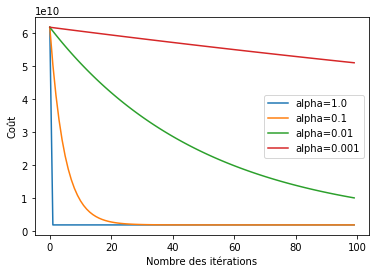

In [77]:
ITMAX  = 100
Alphas = [1., 0.1, 0.01, 0.001]

# Création et entraînement des nouveaux modèles de régression linéaire
for Alpha in Alphas:
    # Création d'un nouveau modèle de régression linéaire
    modele = Regression(Alpha=Alpha, log=False)
    # Entraînement du modèle
    modele.entrainer(Xhouses_train, Yhouses_train, nbr_iter=ITMAX)
    # Visualisation de la convergence
    plt.plot(modele.couts, label = 'alpha=' + str(Alpha))
    
plt.xlabel('Nombre des itérations')
plt.ylabel('Coût')
plt.legend()
#plt.autoscale()
plt.show()

**TODO : Analyser les résultats** [5mn]

- Que remarquez-vous ?
- Donner une hypothèse concernant le rapport entre le taux et la convergence
- Essayer de justifier cette hypothèse par ce que vous avez vu en cours
- Pourquoi on n'utilise pas un taux égale à 1 en pratique (quel est le risque) ?

**Réponse**
- La focntion cout diminue plus rapidement en augmentant le alpha, plus il se rapproche de 1, plus le nombre d'itérations nécessaires pour atteindre le meme cout diminue
- Il y'a corrélation positive entre le taux et la convergence, plus le taux augmente, plus la fonction prend moins de temps pour converger
- Le alpha représente le pas de la méthode de la descente, plus le alpha augmente, plus le pas de chaque itération de descente est grand, donc l'algorithme converge plus rapidement à condition qu'on dépasse pas un certain seuil à partir duquel on pourrait zapper l'optimum
- Mathématiquement, on pas convergence pour alpha = 1, on risque divergence 

#### II.1.2. Qualité de prediction 

Ici, on veut tester la qualité de prédiction de la régression linéaire : est-ce qu'elle peut bien estimer les résultats. 
Pour ce faire, on a entraîné notre modèle sur les données d'entraînement (en bleu). 
Ensuite, on a essayé d'estimer les résultats de test (en vert) 

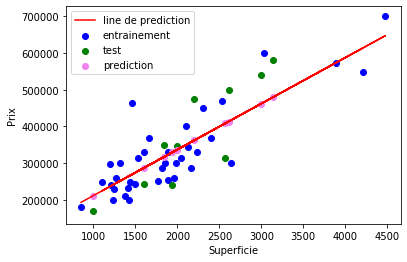

In [78]:
from sklearn.linear_model  import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline      import make_pipeline

# Entraînement d'un modèle de régression linéaire 
regresseur1 = make_pipeline(StandardScaler(with_mean=False), LinearRegression())
regresseur1.fit(Xhouses_train, Yhouses_train)

Yhouses_pred = regresseur1.predict(Xhouses_test )
Yhouses_line = regresseur1.predict(Xhouses_train)  

# Visualiser la distribution des données d'entraînement et de test
# Aussi, la ligne de prédiction et la prédiction du dataset de test
plt.scatter(Xhouses_train, Yhouses_train, color='blue',   label = 'entrainement'      )
plt.scatter(Xhouses_test,  Yhouses_test,  color='green',  label = 'test'              )
plt.plot   (Xhouses_train, Yhouses_line,  color="red",    label = 'line de prediction')
plt.scatter(Xhouses_test,  Yhouses_pred,  color="violet", label = "prediction"        )
plt.xlabel('Superficie')
plt.ylabel('Prix')
plt.legend()
plt.show()

**TODO : Analyser les résultats** [5mn]

- Est-ce que la régression linéaire peut prédire exactement les valeurs Y ?
- Pourquoi ?

**Réponse**

- Est-ce que la régression linéaire peut prédire exactement les valeurs Y ?
   - [ ] Oui 
   - [x] Non
- L'effet linéaire de la superficie sur le prix n'est pas très fort, l'erreur de prédiction est du à un biais grand

#### II.1.3. Qualité de prédiction avec plus de caractéristiques

On veut tester si l'utilisation de plusieurs caracétristiques peut améliorer la prédiction. 
Aussi, on veut savoir si plusieurs caractéristiques améliore toujours la qualité de prédiction. 
Pour ce faire, nous avons créé des nouvelles caractéristiques pour avoir une régression polynomiale : $X^5$ et $X^{10}$.

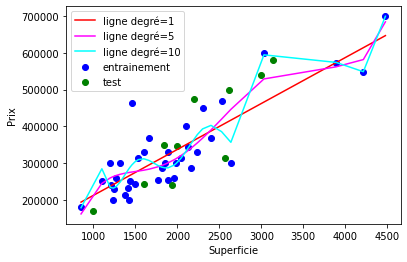

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics       import mean_squared_error

degres = [5, 10]

erreurs_labels = [1] + degres
erreurs_rmse   = [np.sqrt(mean_squared_error(Yhouses_test, Yhouses_pred))]

couleurs=['magenta', 'cyan']

# Ordonner le dataset en se basant sur la superficie
# Ensuite, récupérer la liste des indexes (positions ordonnées)
idx = Xhouses_train[:,0].argsort()

# Visualiser la distribution des données d'entraînement et de test
plt.scatter(Xhouses_train, Yhouses_train, color='blue',  label = 'entrainement')
plt.scatter(Xhouses_test,  Yhouses_test,  color='green', label = 'test')
# Dessiner la ligne de décision
plt.plot(Xhouses_train[idx], regresseur1.predict(Xhouses_train[idx]), color='red', label = 'ligne degré=1')

# Entraîner des modèles polynomiaux et visualiser leur convergence
for i in range(len(degres)):
    regresseur = make_pipeline(PolynomialFeatures(degree=degres[i], include_bias=False), 
                               StandardScaler(with_mean=False), 
                               LinearRegression())  
    regresseur.fit(Xhouses_train, Yhouses_train)  
    plt.plot(Xhouses_train[idx], regresseur.predict(Xhouses_train)[idx], 
             color=couleurs[i],  label = "ligne degré=" + str(degres[i]))
    Yhouses_pred = regresseur.predict(Xhouses_test) 
    erreurs_rmse.append(np.sqrt(mean_squared_error(Yhouses_test, Yhouses_pred)))

plt.xlabel('Superficie')
plt.ylabel('Prix')
plt.legend()
plt.show()

In [20]:
pd.DataFrame({
    "Degré"         : erreurs_labels,
    "Erreur (RMSE)" : erreurs_rmse
})

,Degré,Erreur (RMSE)
0,1,76300.858343
1,5,68683.844226
2,10,125675.109105


**TODO : Analyser les résultats** [7mn]

- Que remarquez-vous (lignes de prédiction et erreur par rapport le degré)?
- Donner une hypothèse (en précisant si plus de données ou avoir des données complexes peut/doit améliorer la performance)
- Essayer de justifier cette hypothèse par rapport ce que vous avez vu en cours 

**Réponse**

Lorsque le degré = 1, la ligne de prédiction est loin du nuage des points d'entraitement et de test et l'erreur est grande (underfitting) par contre 
- L'augmentation du degré implique une meilleure adjustation du nuage des points d'entrainements, plus il augmente plus les points d'entrainement sont miex ajusté des points. Par contre l'erreur de test augmente ( overfitting )
- Plus de données peut améliorer la performance comme il peut la diminuer
- Avoir peu de données et beaucoup caractériqtiques peut résulter en sur apprentissage ( comme dans ce cas), donc augmenter les données peut améliorer la performance. Mais le meilleur modèle est celui obtenu en faisant un compromis entre le biais et la variance.

### II.2. Régression logistique binaire


In [80]:
notes = pd.read_csv("data/notes.csv")

# Extraction des caractéristiques 
X_notes = notes.iloc[:, :-1].values # Premières colonnes 
Y_notes = notes.iloc[:,  -1].values # Dernière colonne 

notes.head()

,Note1,Note2,Admis
0,9.75,16.00,1
1,2.25,9.50,0
2,4.50,2.50,0
3,15.50,10.25,1
4,3.25,19.50,1


#### II.2.1. Normalisation et convergence 

Ici, on veut tester l'effet de la normalisation sur la convergence du modèle.

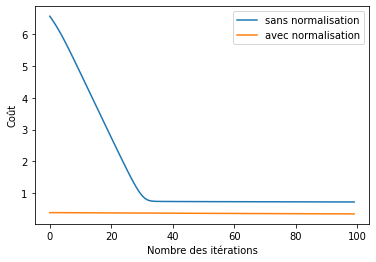

In [22]:
ALPHA = 0.01
ITMAX = 200

# Création des modèles
reg_log_nonorm = Regression(norm=False, Alpha=ALPHA, log=True) # sans normalisation
reg_log_norm   = Regression(norm=True,  Alpha=ALPHA, log=True) # avec normalisation

# Entraînement des modèles
reg_log_nonorm.entrainer(X_notes, Y_notes)
reg_log_norm  .entrainer(X_notes, Y_notes)

# Visualisation de la convergence
plt.plot(reg_log_nonorm.couts, label = 'sans normalisation')
plt.plot(reg_log_norm.couts,   label = 'avec normalisation')
plt.xlabel('Nombre des itérations')
plt.ylabel('Coût')
plt.legend()
#plt.autoscale()
plt.show()

**TODO : Analyser les résultats** [7mn]

- Que remarquez-vous ?
- Donner une hypothèse (convergence avec normalisation)
- Essayer de justifier cette hypothèse par ce que vous avez vu en cours

**Réponse**

- Avec la normalisation, le cout est est proche de 0 dès les premières itérations. Par contre, sans la normalisation le cout nécessite plusieurs itérations avant de se stabiliser et n'atteint pas le cout avec normalisation
- La normalisation résulte en une convrgence plus rapide
- L'objectif de la normalisation est de modifier les valeurs des colonnes numériques de l'ensemble de données pour utiliser une échelle commune, sans déformer les différences dans les plages de valeurs ni perdre d'informations. Supposons que notre ensemble de données d'entrée contienne une colonne dont les valeurs vont de 0 à 1, et une autre colonne dont les valeurs vont de 10 000 à 100 000. La grande différence d'échelle des chiffres pourrait poser des problèmes lorsque on tente de combiner les valeurs en tant que caractéristiques lors de la modélisation. Parce que les différentes caractéristiques n'ont pas des plages de valeurs similaires et que, par conséquent, les gradients peuvent prendre beaucoup de temps et osciller avant de trouver finalement leur le minimum global/local.

#### II.2.2. Complexité du modèle et séparation

On veut améliorer la séparation entre les deux classes : "admis" et "non admis". Pour ce faire, on a proposé d'ajouter des caractéristiques complexes : $X^3$ et $X^5$.

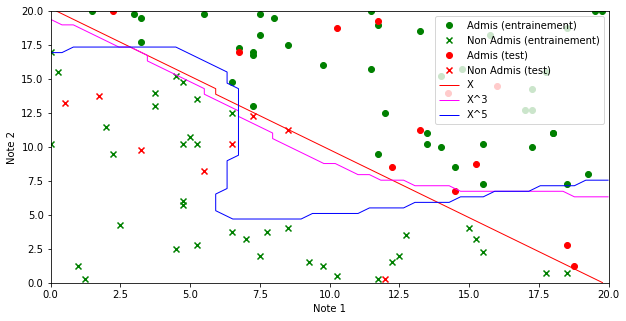

In [23]:
from sklearn.linear_model import LogisticRegression

degres = [3, 5]
couleurs=['red', 'magenta', 'blue']

# Une fonction pour dessiner le plan de séparation binaire étant donnée un modèle
# modele : c'est un modèle enttraîné pour la prédiction binaire
# ax: un objet de type matplotlib.axes.Axes; les axes sur lesquels on va dessiner
# xrange: une liste des points sur l'axe X
# yrange: une liste des points sur l'axe Y
# couleur: la couleur du dessin (de la ligne de séparation)
# label: l'étiquêtte du dessin (la ligne de séparation)
def dessiner2D(modele, ax, xrange, yrange, couleur='red', label=''):
    # Créer une matrice de (xrange X yrange): notre plan de dessin
    XX = [[[xr, yr] for xr in xrange] for yr in yrange]
    # Représenter le sous forme d'une matrice de (xrange X yrange)/2 échantillons et 2 caractéristiques
    XX = np.array(XX).reshape(-1, 2)
    # Prédire les probabilités (estimation) et retransformer vers notre plan (xrange X yrange)
    grid = modele.predict(XX).reshape(len(xrange), len(yrange))
    # Dessiner des lignes qui passent par les valeurs 0.5
    cs = ax.contour(xrange, yrange, grid, colors=[couleur], linewidths=(1), linestyles=('-'),levels=[0.5])
    # Affecter l'étiquêtte à la ligne de séparation (qui es un contour dans notre cas)
    cs.collections[0].set_label(label)


X_notes_train = X_notes[:80, :]
X_notes_test  = X_notes[80:, :]
Y_notes_train = Y_notes[:80   ]
Y_notes_test  = Y_notes[80:   ]

# Trouver les indexes ordonnées 
idx2 = X_notes_train[:,0].argsort()

# Sélectionner le cas "admis" dans l'entraînement et le test
oui_train = Y_notes_train == 1
oui_test  = Y_notes_test  == 1

# Dessiner les cas "admis" et "Non admis" de l'entraînement et du test
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(X_notes_train[oui_train, 0], X_notes_train[oui_train, 1], 
           color='green', marker='o', label='Admis (entrainement)')
ax.scatter(X_notes_train[~oui_train, 0], X_notes_train[~oui_train, 1], 
           color='green', marker='x', label='Non Admis (entrainement)')
ax.scatter(X_notes_test[oui_test, 0], X_notes_test[oui_test, 1], 
           color='red', marker='o', label='Admis (test)')
ax.scatter(X_notes_test[~oui_test, 0], X_notes_test[~oui_test, 1], 
           color='red', marker='x', label='Non Admis (test)')

# Créer l'espace des notes : entre 0 et 20 avec une résolution de 50
xrange = np.linspace(0, 20, 50) # Note 1
yrange = np.linspace(0, 20, 50) # Note 2

# Dessiner la ligne de séparation dans une régression linéaire
reglog1 = LogisticRegression(penalty='none')
reglog1.fit(X_notes_train, Y_notes_train)
dessiner2D(reglog1, ax, xrange, yrange, label='X')

# Dessiner la ligne de séparation dans une régression polynomiale
# Le modèle dans ce cas est un pipeline qui commence par créer des caractéristiques polynomiales
# ensuite passe le résultat vers un modèle de régression logistique
for i in range(len(degres)):
    modele = make_pipeline(PolynomialFeatures(degree=degres[i], include_bias=False),
                           LogisticRegression(penalty='none'))
    modele.fit(X_notes_train, Y_notes_train)
    dessiner2D(modele, ax, xrange, yrange, couleur=couleurs[i+1], label='X^' + str(degres[i]))


plt.xlabel('Note 1')
plt.ylabel('Note 2')
plt.legend(loc='upper right')
plt.show()

**TODO : Analyser les résultats** [7mn]

- Que remarquez-vous (les nouveaux modèles ont-il été capables d'améliorer le modèle initial: l'adjustement/fitting et la généralisation) ? 
- Donner une hypothèse (Quelle est la raison d'amélioration/détérioration ?) 
- Essayer de justifier cette hypothèse par ce que vous avez vu en cours

**Réponse**

- Les nouveaux modèles ajustes mieux le nuage des points d'entrainement par contre ils ne généralisent pas aux nouvelles données
- La détérioration du modèle est du a un overfitting qui est causé par une variance élevée. Plus les caractéristiques sont complexes plus le modèle se détériore
- On a pas assez de données pour entrainer avec des caractériqtiques plus complexes. Avoir peu de données et beaucoup caractériqtiques (plus complexes) peut résulter en sur apprentissage 

### II.3. Régularisation

On va utiliser le dataset [Diabetics prediction using logistic regression](https://www.kaggle.com/kandij/diabetes-dataset). 

Nous avons entrainé 3 modèles :
- **reglog** : régression logistique sans régularisation
- **reglog_l1** : régression logistique avec régularisation L1
- **reglog_l2** : régression logistique avec régularisation L2

Nous avons testé ces modèles en utilisant deux datasets (avec la métrique F1 dans chaque itération) :
- **entrainement** : pour tester la convergence (fitting)
- **test** : pour tester la généralisation

Afin de capturer les F1 scores et les paramètres, nous avons entrainé chaque modèle avec une seule itération et utiliser une boucle globale pour contrôler les traitements de chaque itération. Pour continuer l'entrainement à partir des thétas précédents, nous avons activé l'option **warm_start**. Ceci va générer des graphiques non lisses (puisqu'on lance l'algorithme d'optimisation à chaque itération).

In [24]:
diabetes   = pd.read_csv('data/diabetes2.csv') 
X_diabetes = diabetes.iloc[:, :-1].values  
Y_diabetes = diabetes.iloc[:,  -1].values

# Cette configuration est mise en place comme ceci exprès
# C'est pour tester le cas où la régression est difavorisée
NBR_TEST = 240
# Supposant que les 30% premières lignes sont pour le test et le reste pour l'entraînement
X_test  = X_diabetes[-NBR_TEST:, :] # 30% ou plus
Y_test  = Y_diabetes[-NBR_TEST:   ]

X_train = X_diabetes[:-NBR_TEST, :] 
Y_train = Y_diabetes[:-NBR_TEST   ]

diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
from sklearn.exceptions   import ConvergenceWarning
from sklearn.linear_model import LogisticRegression
from sklearn.metrics      import f1_score

import warnings
warnings.filterwarnings('ignore', category=ConvergenceWarning)

MAX_IT     = 500
CC         = 0.002
COEF_      = np.array([[1.] * X_train.shape[1]])
INTERCEPT_ = np.array([1.])

# Création des modèles de régression logistique : sans régularisation, avec L1 et avec L2
reglog    = LogisticRegression(penalty='none', solver='saga', max_iter=1, warm_start=True, random_state=0      )
reglog_l1 = LogisticRegression(penalty='l1',   solver='saga', max_iter=1, warm_start=True, random_state=0, C=CC)
reglog_l2 = LogisticRegression(penalty='l2',   solver='saga', max_iter=1, warm_start=True, random_state=0, C=CC)

# Initialisation des paramètres de tous les modèles par des 1
# Lorsqu'on veut comparer entre les paramètres, on doit commencer à partir du même point
# Les paramètres Theta
reglog.coef_    = COEF_
reglog_l1.coef_ = COEF_
reglog_l2.coef_ = COEF_
# Theta0
reglog.intercept_    = INTERCEPT_
reglog_l1.intercept_ = INTERCEPT_
reglog_l2.intercept_ = INTERCEPT_

# Historique des paramètres
coefs         = []
coefs_ridge   = []
coefs_lasso   = []

coefs0        = []
coefs0_ridge  = []
coefs0_lasso  = []

# Historique F1 entrainement (convergence) et test (generalisation)
f1train       = []
f1train_ridge = []
f1train_lasso = []

f1test        = []
f1test_ridge  = []
f1test_lasso  = []


for it in range(MAX_IT):
    # entraînement des modèles
    reglog   .fit(X_train, Y_train)
    reglog_l1.fit(X_train, Y_train)
    reglog_l2.fit(X_train, Y_train)
    
    # sauvegarder les paramètres
    coefs      .append(reglog   .coef_.flatten().tolist())
    coefs_lasso.append(reglog_l1.coef_.flatten().tolist())
    coefs_ridge.append(reglog_l2.coef_.flatten().tolist())
    
    coefs0      .append(reglog   .intercept_[0])
    coefs0_lasso.append(reglog_l1.intercept_[0])
    coefs0_ridge.append(reglog_l2.intercept_[0])
    
    # sauvegarder les scores F1
    
    f1train      .append(f1_score(Y_train, reglog   .predict(X_train)))
    f1train_lasso.append(f1_score(Y_train, reglog_l1.predict(X_train)))
    f1train_ridge.append(f1_score(Y_train, reglog_l2.predict(X_train)))
    
    f1test       .append(f1_score(Y_test,  reglog   .predict(X_test )))
    f1test_lasso .append(f1_score(Y_test,  reglog_l1.predict(X_test )))
    f1test_ridge .append(f1_score(Y_test,  reglog_l2.predict(X_test )))

print('fin entraînement')

fin entraînement


#### II.3.1.  Convergence et généralisation sans et avec régularisation par itérations

Ici, on suppose que l'algorithme a convergé lorsqu'il atteint le maximum de F1 score dans l'antrainement (normalement, il doit sortir s'il y a une chutte de F1 score et retourne les thétats les plus optimaux). Donc, au delà du point de la convergence, nous avons continuer l'itération pour voir ce qui va se passer. 


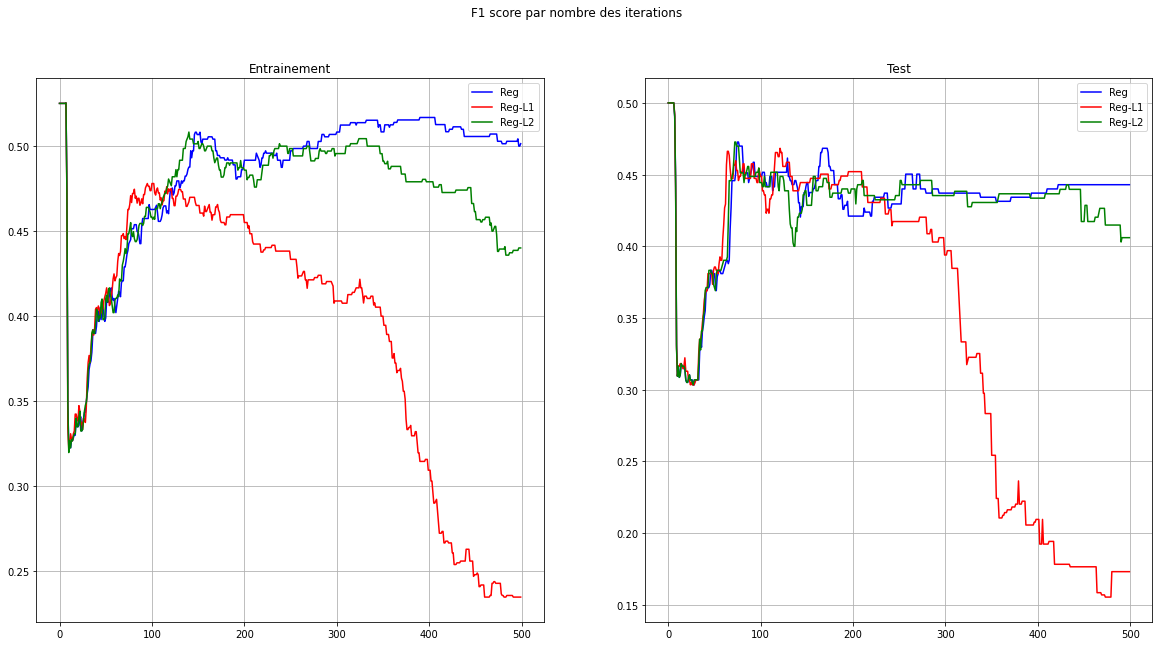

In [26]:
coefs = np.array(coefs)
coefs_lasso = np.array(coefs_lasso)
coefs_ridge = np.array(coefs_ridge)

fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('F1 score par nombre des iterations')
fig.set_figwidth (20)
fig.set_figheight(10)

ax1.plot(range(MAX_IT), f1train,       color='blue',  label='Reg'   )
ax1.plot(range(MAX_IT), f1train_lasso, color='red',   label='Reg-L1')
ax1.plot(range(MAX_IT), f1train_ridge, color='green', label='Reg-L2')
ax1.legend()
ax1.set_title('Entrainement')
ax1.grid()

ax2.plot(range(MAX_IT), f1test,        color='blue',  label='Reg'   )
ax2.plot(range(MAX_IT), f1test_lasso,  color='red',   label='Reg-L1')
ax2.plot(range(MAX_IT), f1test_ridge,  color='green', label='Reg-L2')
ax2.legend()
ax2.set_title('Test')
ax2.grid()

plt.show()

**TODO: Analyser les résultats** [15mn]

- Que remarquez-vous ?
- Analyser les cas de convergence (qui converge plus rappidement, avec quel prix (quel est le gain ou la perte)) en précisant dans ce cas l'intérêt de la régularisation. 
- Pourquoi les modèles avec régularisation perdent-ils de performance en avançant le nombre des itérations ?

**Réponse**

- On remarque un F1 score élévé au début pour tous les modèles ensuite il diminue dans le cas de la régularisation
- En ce qui concerne l'entrainement, avant de dépasser l'itération 110, les 3 modèles convergent plus ou moins avec la meme vitesse sauf pour le L2 qui a un gain de 0.02 entre les itérations 80 et 110.
En dépassant l'itération 110 le modèle sans régularisation continue à s'améliorer par contre les autres modèles avec régularisation perdent leurs performances. En effet, le modèle reg-L2 commence à se détériorer à partir d'environ l'itération 300 avec une perte de 0.06 à l'itération 500. Le modèle reg-L1 se détériore des l'itération 110 et attaint une perte de 2.7 vers l'itération 500 ( une énorme perte de performance )
En ce qui concerne le test, les modèles ont une performance quasi similaire avant l'itération 250. Ensuite, le modèle sans régularisation garde sa performance et les autres se détériore : le modèle reg-l2 perd 0.05 en performance vers les itérations 450 et le modèle reg-l1 chute énormement à partir de l'itération 250 pour perdre 2.8 de perfomance
On peut expliquer les phénomènes obsérvés par :
La regularisation l2 conserve toutes les variables mais, elle les empeche de prendre de trop grandes valeurs et limite ainsi la variance.
La régularisation l1 estime à zéro les effets peu importants.Lorsque les variables sont corrélées, une seule est prise en consideration.
Ce qui réduit ainsi la complexité du modèle (overfitting) et donne de meilleures performances

- Les modèles de régularisation perdent leur performance en avançant le nombre des itérations car les poids theta tendent vers zero 

#### II.3.2. Convergence des paramètres par itérations

Ici, nous avons afficher les valeurs des paramètres thétas pour chaque itération. 

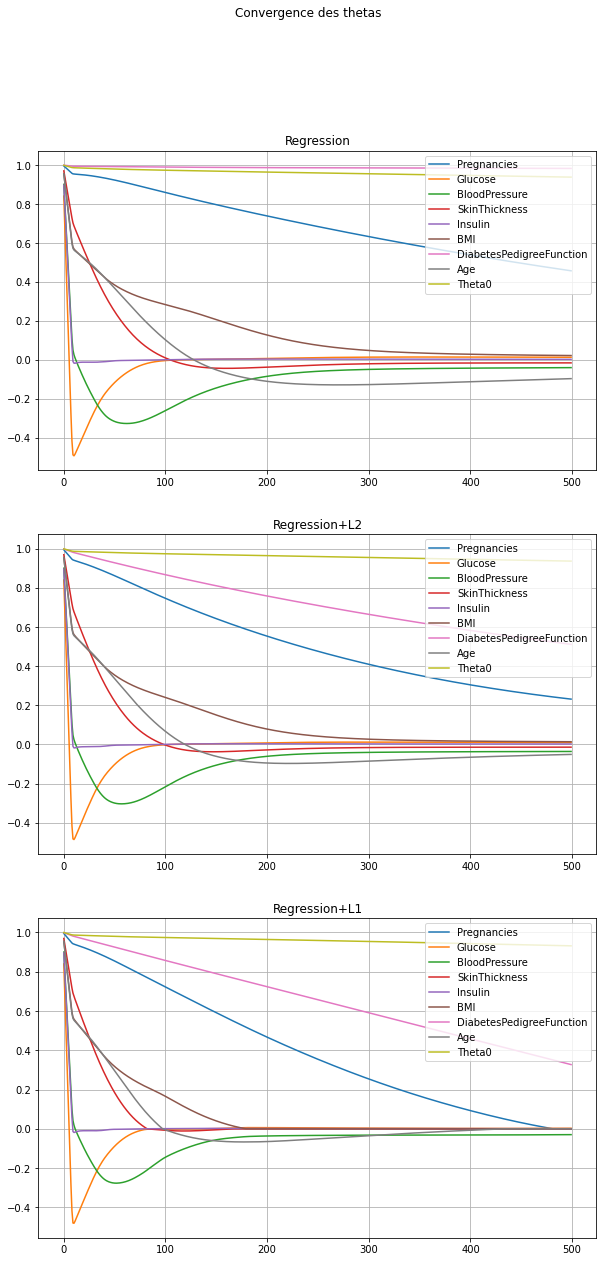

In [27]:
labels = list(diabetes.columns)
labels.pop() # supprimer la dernière colonne (classe)

fig, (ax1, ax2, ax3) = plt.subplots(3,1)
fig.suptitle('Convergence des thetas')
fig.set_figwidth (10)
fig.set_figheight(20)

# Dessiner la convergence de chaque paramètre/caractéristique dans les trois modèles
for i in range(len(labels)): 
    ax1.plot(range(MAX_IT), coefs[:, i],       label=labels[i])
    ax2.plot(range(MAX_IT), coefs_ridge[:, i], label=labels[i])
    ax3.plot(range(MAX_IT), coefs_lasso[:, i], label=labels[i])

# Dessiner la convergence de Théta0 dans les trois modèles
ax1.plot(range(MAX_IT), coefs0,       label='Theta0')
ax2.plot(range(MAX_IT), coefs0_ridge, label='Theta0')
ax3.plot(range(MAX_IT), coefs0_lasso, label='Theta0')

ax1.legend()
ax2.legend()
ax3.legend()

ax1.set_title('Regression'   )
ax2.set_title('Regression+L2')
ax3.set_title('Regression+L1')

ax1.grid()
ax2.grid()
ax3.grid()

plt.show()

**TODO: Analyser les résultats** [15mn]

- Que remarquez-vous ?
- Analyser la convergence des valeurs des paramètres entre les trois modèles (pourquoi dans les deux modèles avec régularisation, les valeurs se rapprochent plus de 0, pourquoi il y a des paramètres qui convergent plus rappidement que d'autres)
- Est-ce qu'on peut retirer quelques attributs jugés importants par le modèle ? Si oui, lequels ici ? Si non, pourquoi ?
- Est-ce qu'on peut utiliser la régularisation comme sélection d'attribut ? Préciser (avec argumentation)

**Réponse**

- Les paramètres dans le modèle reg-l1 converge plus rapidement vers zero que ceux du modèle reg-l2. Et ces derniers converge plus rapidement que ceux du modèle sans régularisation 
- Dans les deux modèles aves régularisation les paramètres se rapprochent plus de 0 car la régularisation limite les valeurs des paramètres pour remedier à l'overfitting
Aussi, il y a des paramètres qui converge plus rapidement que d'autres car la régularisation favorise des variables sur d'autres en effet, la regularisation l2 conserve toutes les variables mais, elle les empeche de prendre de trop grandes valeurs et limite ainsi la variance. La régression l1 estime à zéro les effets peu importants et lorsque les variables sont corrélées, une seule est prise en consideration. Ce qui explique pourquoi les paramètres convergent plus rapidement vers zéro
- Les attributs : BMI, SkinThickness et Insulin sont estimés à zéro par le modèle l1 ce qui est du à leurs effets peu importants ou leurs fortes corrélation avec d'autres attributs qui sont pris en considération. Donc, on peut les retirer.
- ...